<a href="https://colab.research.google.com/github/NADANOUHAADERGHAL/heart-discase-prediction-project/blob/main/heart_disease_predection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing packages


In [79]:

import numpy as np # linear algebra
import pandas as pd  # data processing
from sklearn.model_selection import train_test_split # training and testing and split the model
from sklearn.linear_model import LogisticRegression  #we use logistic regression algorithm
from sklearn.metrics import accuracy_score #evaluation the model
import seaborn as sns
import matplotlib.pyplot as plt



data collection and processing


In [81]:
heart_disease_datasets=pd.read_csv('/content/heart_dataset.csv')
heart_disease_datasets

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [50]:
#print the frist five rows
heart_disease_datasets.head()


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [82]:
#print the last five rows
heart_disease_datasets.tail()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0


In [83]:
#numbers of rows and columns
heart_disease_datasets.shape

(4238, 16)

In [85]:
# datasets statistics
heart_disease_datasets.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [87]:
#getting some information about our datasets
heart_disease_datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [88]:
#cheking for missing values
heart_disease_datasets.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

central  tendencies :

1_mean

2_mediam

3_mode


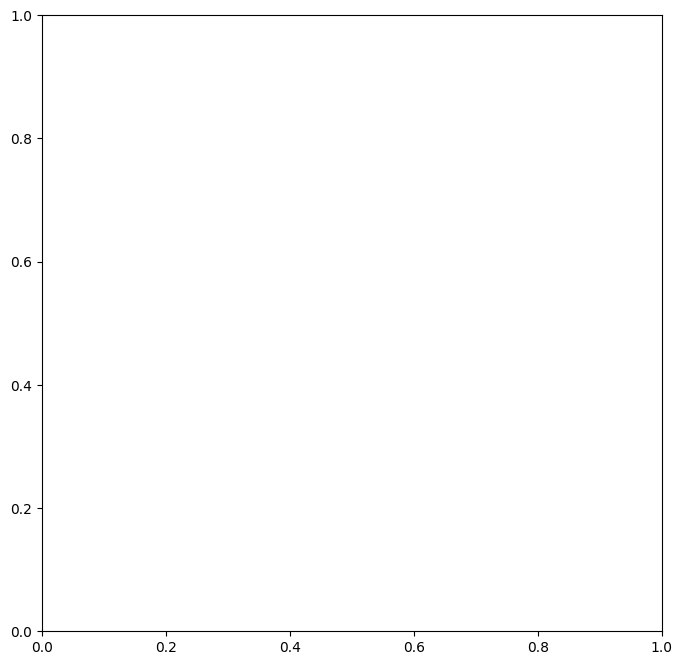

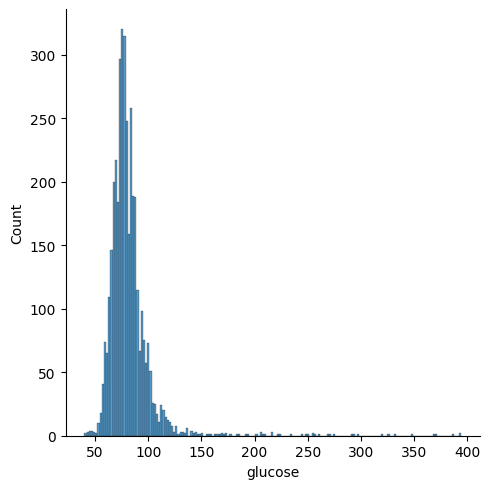

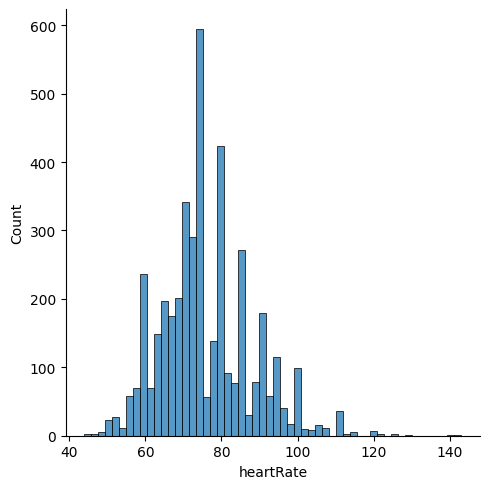

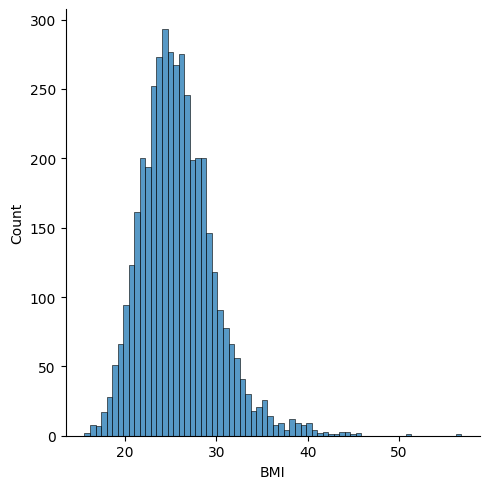

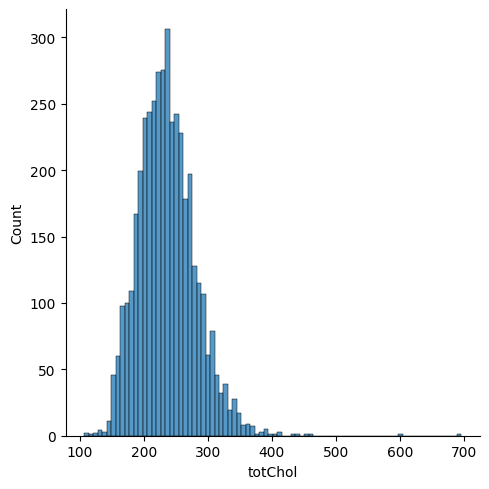

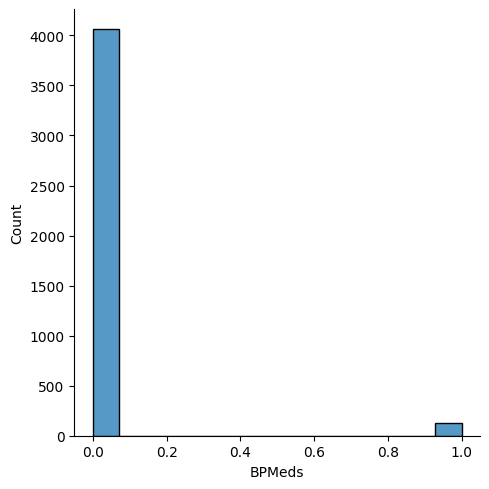

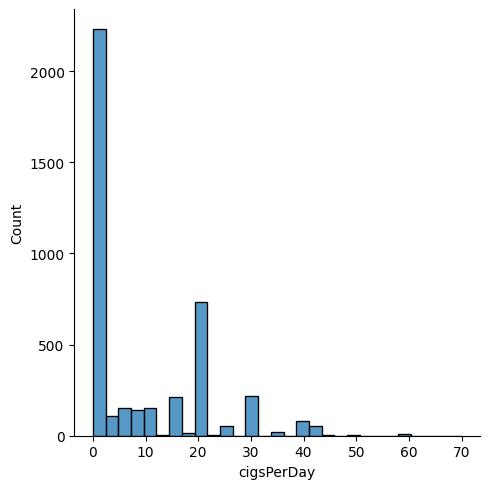

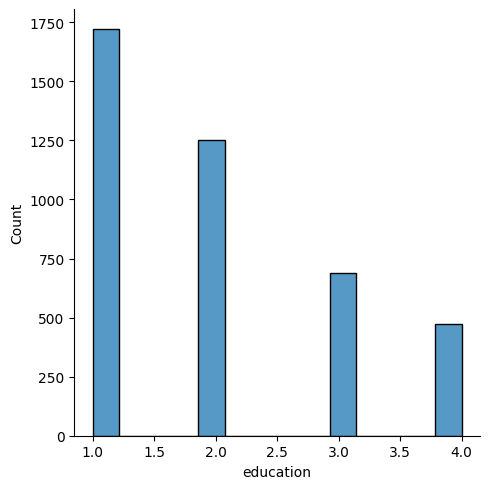

In [89]:
# analyse distribution of data in glucose, heartrate,bmi,totchol,bpmeds,educa tion columns
fig,ax = plt.subplots(figsize=(8,8))
sns.displot(heart_disease_datasets.glucose)
sns.displot(heart_disease_datasets.heartRate)
sns.displot(heart_disease_datasets.BMI)
sns.displot(heart_disease_datasets.totChol)
sns.displot(heart_disease_datasets.BPMeds)
sns.displot(heart_disease_datasets.cigsPerDay)
sns.displot(heart_disease_datasets.education)

replace missing value with median value

In [90]:
heart_disease_datasets['BMI'].fillna(heart_disease_datasets['BMI'].median(),inplace=True)
heart_disease_datasets['glucose'].fillna(heart_disease_datasets['glucose'].median(),inplace=True)
heart_disease_datasets['heartRate'].fillna(heart_disease_datasets['heartRate'].median(),inplace=True)
heart_disease_datasets['totChol'].fillna(heart_disease_datasets['totChol'].median(),inplace=True)
heart_disease_datasets['BPMeds'].fillna(heart_disease_datasets['BPMeds'].median(),inplace=True)
heart_disease_datasets['cigsPerDay'].fillna(heart_disease_datasets['cigsPerDay'].median(),inplace=True)
heart_disease_datasets['education'].fillna(heart_disease_datasets['education'].median(),inplace=True)

In [91]:
heart_disease_datasets.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [92]:
#cheking the distrubition of target variable
heart_disease_datasets ['TenYearCHD'].value_counts()

0    3594
1     644
Name: TenYearCHD, dtype: int64

1=defctive heart

0=healthy heart

In [93]:
#spliting the features and targert
x=heart_disease_datasets.drop(columns='TenYearCHD',axis=1)
y=heart_disease_datasets['TenYearCHD']

In [94]:
print(x)

      male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1   39        4.0              0         0.0     0.0   
1        0   46        2.0              0         0.0     0.0   
2        1   48        1.0              1        20.0     0.0   
3        0   61        3.0              1        30.0     0.0   
4        0   46        3.0              1        23.0     0.0   
...    ...  ...        ...            ...         ...     ...   
4233     1   50        1.0              1         1.0     0.0   
4234     1   51        3.0              1        43.0     0.0   
4235     0   48        2.0              1        20.0     0.0   
4236     0   44        1.0              1        15.0     0.0   
4237     0   52        2.0              0         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    195.0  106.0   70.0  26.97   
1                   0             0         0    250.0  121.0

In [95]:
print(y)

0       0
1       0
2       0
3       1
4       0
       ..
4233    1
4234    0
4235    0
4236    0
4237    0
Name: TenYearCHD, Length: 4238, dtype: int64


In [96]:
#splitting data to train and test data
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [97]:
print(x.shape,x_train.shape,x_test.shape)

(4238, 15) (3390, 15) (848, 15)


Model Training


In [98]:
#use logistic regression algo
model=LogisticRegression()


In [99]:
#training  the linearregression model with training data
model.fit(x_train , y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Evaluation the model

In [100]:
#accuracy_score on training data

x_train_prediction =model.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction, y_train)

print( 'accuracy in training data is :',training_data_accuracy)


accuracy in training data is : 0.852212389380531


In [101]:
#accuracy_score on test data
x_test_prediction =model.predict(x_test)
testing_data_accuracy=accuracy_score(x_test_prediction, y_test)
print('accuracy in testing data is :',testing_data_accuracy)


accuracy in testing data is : 0.847877358490566


building a predective system


In [104]:
input_data=(1,39,4,0,0,0,0,0,0,195,106,70,26.97,80,77)
#change the input data to numpy array
input_data_as_numpy_array=np.asarray(input_data)

#reshape the numpy array as we are predecting for only one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction= model.predict(input_data_reshaped)
print(prediction)


[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [105]:
if (prediction[0]==0):
 print('the person does not have a heard disease')
else:
 print('the person has a heard disease')

the person does not have a heard disease
